In [1]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras import Model

In [ ]:
#pip install opencv-python

In [2]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14 (1).pbtxt'
frozen_model='frozen_inference_graph (1).pb'

In [ ]:
#pip install --upgrade opencv-python

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)


< cv2.dnn.Model 0000019BF49F1CB0>

In [49]:
img = cv2.imread('bicycle.jpeg')

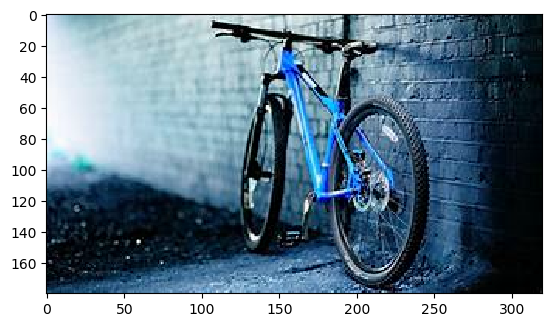

In [50]:
plt.imshow(img)

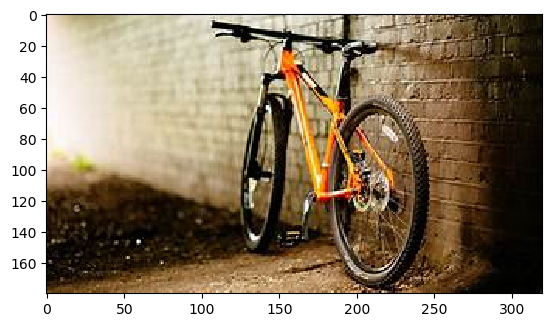

In [51]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [52]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [53]:
print(ClassIndex)

[2]


In [54]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(225,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font,fontScale=font_scale,color=(0,255,0),thickness=3)

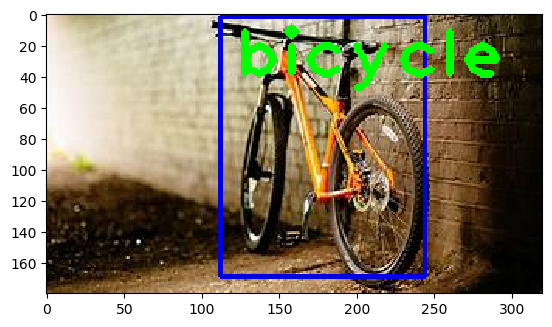

In [55]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))